In [2]:
(asdf:load-system :imago/jupyter)
(asdf:load-system :porous-media-segmentation)

T

T

SB-KERNEL:REDEFINITION-WITH-DEFMACRO: redefining QUEUES-SYSTEM::QUICK-DEFSYSTEM in DEFMACRO


*IMG*

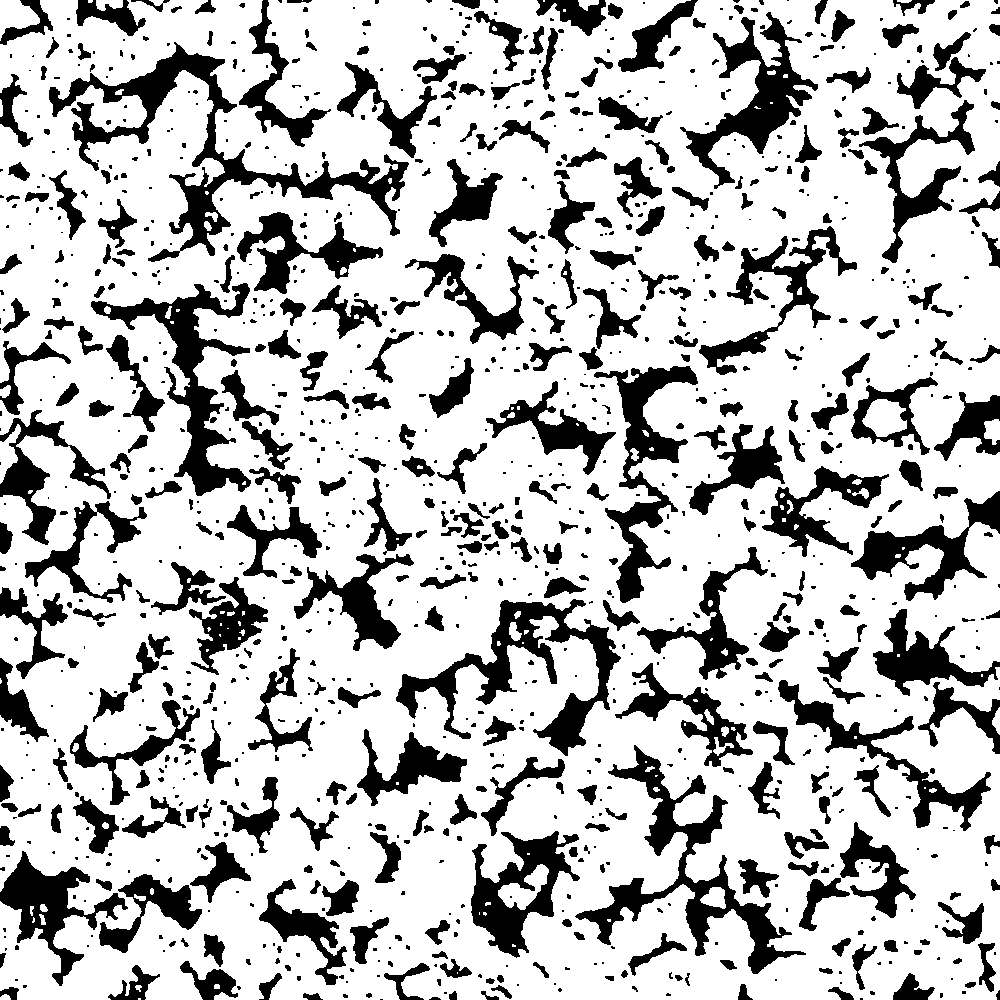

In [23]:
(defparameter *img*
  (imago:read-image
    (asdf:system-relative-pathname :porous-media-segmentation
                                   "docs/sandstone.pbm")))
(imago-jupyter:show-image *img*)

*SEGM*

*COLORS*

*SEGMENTED-IMAGE*

NIL

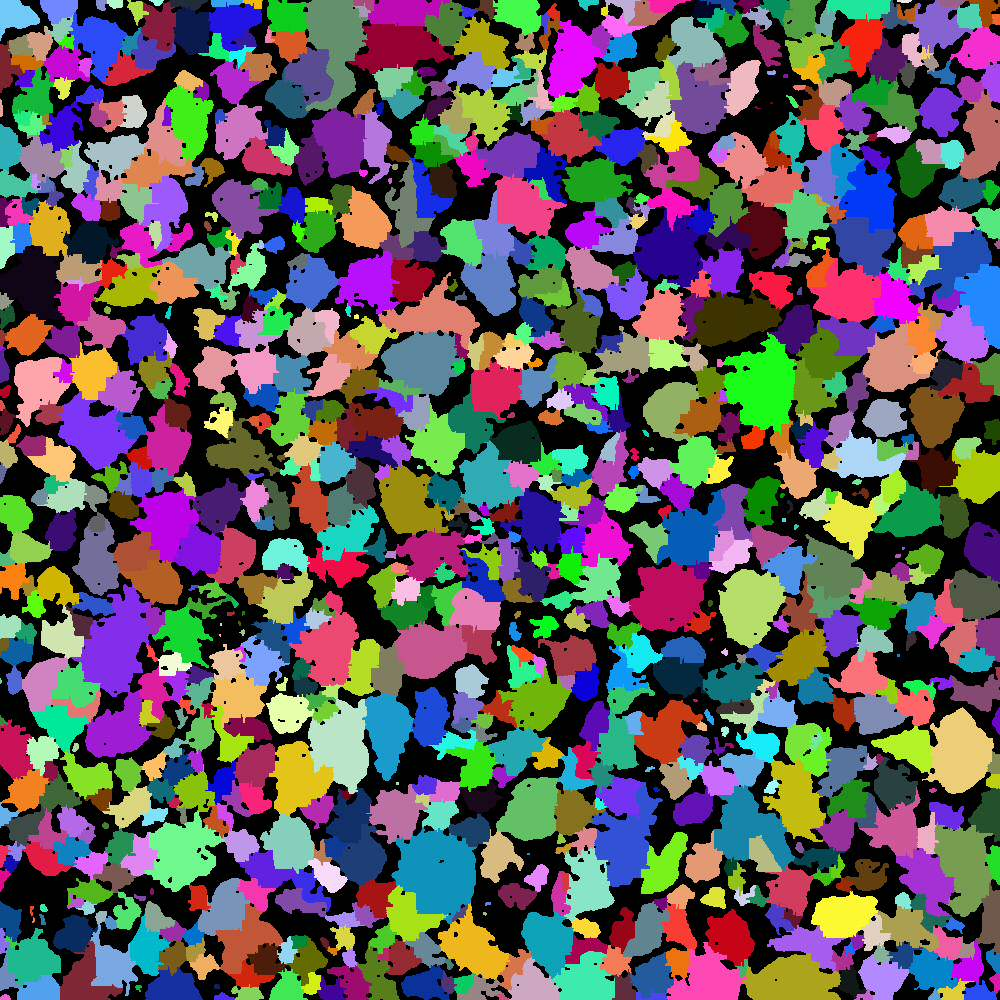

In [26]:
(defparameter *segm* (pm-segmentation:label *img* :radius 8))

(defparameter *colors*
  (cons (imago:make-color 0 0 0)
        (loop repeat (reduce #'max (aops:flatten *segm*)) collect
              (imago:make-color (random 256) (random 256) (random 256)))))

(defparameter *segmented-image*
  (make-instance 'imago:rgb-image :width 1000 :height 1000))
(imago:do-image-pixels
  (*segmented-image* color x y)
  (setf color (nth (aref *segm* y x) *colors*)))

(imago-jupyter:show-image *segmented-image*)